# Defensemen Model
Let's calculate a few not-so-obvious attributes from our player data and see if these attributes correlate to professional levels

In [3]:
import os
import pandas as pd
import numpy as np

In [7]:
# Read in data set
path = os.path.abspath(os.path.join(os.getcwd(), '..'))
path = os.path.abspath(os.path.join(path, 'data/df_all_events.pkl'))
print(path)

df = pd.read_pickle(path)
df.head()

/Users/williamshaw/Projects/NHL/Big-Data-Cup-2021/data/df_all_events.pkl


,game_date,home_team,away_team,period,clock,home_team_skaters,away_team_skaters,home_team_goals,away_team_goals,team,...,event,x_coord_1,y_coord_1,detail_1,detail_2,detail_3,detail_4,player_2,x_coord_2,y_coord_2
0,2019-09-20,Erie Otters,Sudbury Wolves,1,20:00,5,5,0,0,Sudbury Wolves,...,Faceoff Win,100,43,Forehand,NaN,NaN,NaN,Connor Lockhart,NaN,NaN
1,2019-09-20,Erie Otters,Sudbury Wolves,1,19:58,5,5,0,0,Sudbury Wolves,...,Puck Recovery,67,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-09-20,Erie Otters,Sudbury Wolves,1,19:53,5,5,0,0,Sudbury Wolves,...,Incomplete Play,45,49,Direct,NaN,NaN,NaN,Blake Murray,74.0,35.0
3,2019-09-20,Erie Otters,Sudbury Wolves,1,19:52,5,5,0,0,Erie Otters,...,Puck Recovery,89,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-09-20,Erie Otters,Sudbury Wolves,1,19:51,5,5,0,0,Erie Otters,...,Incomplete Play,82,49,Direct,NaN,NaN,NaN,Connor Lockhart,94.0,46.0


In [32]:
df['player_1'].value_counts()

Maxim Golod          3117
Chad Yetman          2810
Jamie Drysdale       2756
Jack Duff            2584
Kurtis Henry         2539
                     ... 
Ryan Thompson           8
Ranvir Gill-Shane       7
Logan LeSage            7
James Jodoin            6
Joe Ranger              6
Name: player_1, Length: 408, dtype: int64

### Clean Shots Percentage
A quality of good offensive-defensemen is the ability to get shots to the net (i.e. shots do not get blocked or miss the net). Players who can get shots to the net allow offensive players more oppurtunities to score 'greasy' rebound goals. While sometimes defenseman are credited with an assist when rebound goals are scored, other times they are not and that is why this stat is important to track.

In [25]:
# filter events to only shots and goals
df_shots = df[df['event']=='Shot']
df_goals = df[df['event']=='Goal']
df_sg = pd.concat([df_shots, df_goals])
df_sg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5180 entries, 16 to 75565
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   game_date          5180 non-null   object 
 1   home_team          5180 non-null   object 
 2   away_team          5180 non-null   object 
 3   period             5180 non-null   int64  
 4   clock              5180 non-null   object 
 5   home_team_skaters  5180 non-null   int64  
 6   away_team_skaters  5180 non-null   int64  
 7   home_team_goals    5180 non-null   int64  
 8   away_team_goals    5180 non-null   int64  
 9   team               5180 non-null   object 
 10  player_1           5180 non-null   object 
 11  event              5180 non-null   object 
 12  x_coord_1          5180 non-null   int64  
 13  y_coord_1          5180 non-null   int64  
 14  detail_1           5180 non-null   object 
 15  detail_2           5180 non-null   object 
 16  detail_3           518

<AxesSubplot:xlabel='x_coord_1', ylabel='y_coord_1'>

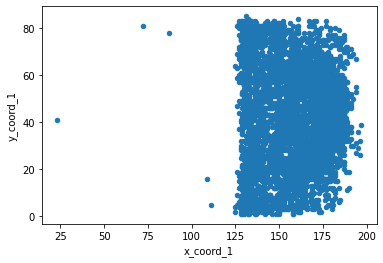

In [26]:
df_sg.plot.scatter(x='x_coord_1', y='y_coord_1')